In [4]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\raw\exoplanet_raw.csv",
    comment="#"
)

df.head()


C:\Users\tumar\AppData\Local\Temp\ipykernel_30436\1474856372.py:3: DtypeWarning: Columns (0: hd_name, 1: hip_name) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df.isnull().sum()


rowid               0
pl_name             0
hostname            0
pl_letter           0
hd_name         36309
                ...  
st_nrvc            50
st_nspec           50
pl_nespec          50
pl_ntranspec       50
pl_ndispec         50
Length: 123, dtype: int64

## Handling Missing Values

The dataset contains missing values in several planetary and stellar features.
Missing data can negatively impact machine learning models, so appropriate
handling is required.

In this project, rows with missing values in critical habitability-related
features such as planetary radius, planetary mass, and equilibrium temperature
are removed. These features are essential for evaluating the habitability
potential of exoplanets.

Less critical missing values will be handled in later stages if required.


In [6]:
critical_features = ["pl_rade", "pl_bmasse", "pl_eqt"]

df_clean = df.dropna(subset=critical_features)

df_clean.isnull().sum()


rowid              0
pl_name            0
hostname           0
pl_letter          0
hd_name         1573
                ... 
st_nrvc            0
st_nspec           0
pl_nespec          0
pl_ntranspec       0
pl_ndispec         0
Length: 123, dtype: int64

In [7]:
print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)


Before cleaning: (39212, 123)
After cleaning: (1809, 123)


## Outlier Handling

Outliers are extreme values that differ significantly from other observations
in the dataset. In exoplanet data, extremely large planets or unusually high
temperatures can negatively influence machine learning models.

In this project, outliers are treated by applying reasonable upper limits to
planetary radius and equilibrium temperature based on scientific intuition.
This helps ensure that the dataset focuses on planets that are more relevant
for habitability analysis.


In [8]:
# Remove extreme planetary sizes
df_no_outliers = df_clean[df_clean["pl_rade"] < 10]

# Remove extreme temperatures
df_no_outliers = df_no_outliers[df_no_outliers["pl_eqt"] < 1000]

df_no_outliers.shape


(632, 123)

In [9]:
print("After missing value handling:", df_clean.shape)
print("After outlier removal:", df_no_outliers.shape)


After missing value handling: (1809, 123)
After outlier removal: (632, 123)


## Feature Engineering

Feature engineering involves creating new features from existing data to
improve the performance of machine learning models.

In this project, two custom features are engineered:
1. Habitability Score Index – Represents the potential of a planet to support
   life based on temperature and size.
2. Stellar Compatibility Index – Measures how suitable the host star is for
   supporting habitable planets.

These engineered features provide higher-level insights compared to raw data
alone.


In [10]:
df_no_outliers["habitability_score"] = (
    (1 / abs(df_no_outliers["pl_eqt"] - 288)) +
    (1 / df_no_outliers["pl_rade"])
)


In [11]:
df_no_outliers["stellar_compatibility"] = (
    1 / abs(df_no_outliers["st_teff"] - 5778)
)


In [12]:
df_no_outliers[
    ["pl_rade", "pl_eqt", "habitability_score", "stellar_compatibility"]
].head()


,pl_rade,pl_eqt,habitability_score,stellar_compatibility
181,4.07,593.0,0.248979,0.000481
190,3.24,454.0,0.314666,0.000481
207,2.23,546.0,0.452306,0.083333
332,4.88,885.0,0.206593,0.006211
337,5.00,850.0,0.201779,0.001208


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


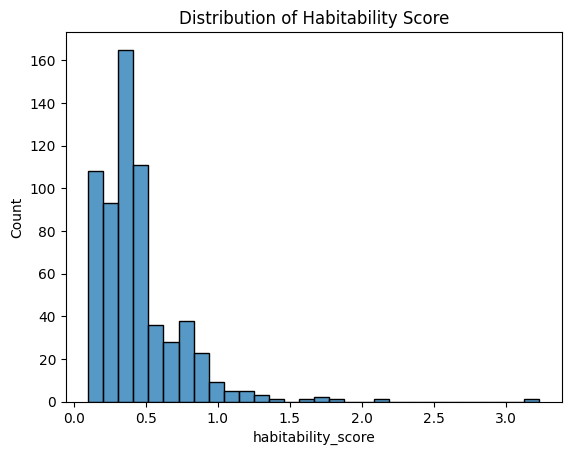

In [14]:
sns.histplot(df_no_outliers["habitability_score"], bins=30)
plt.title("Distribution of Habitability Score")
plt.show()


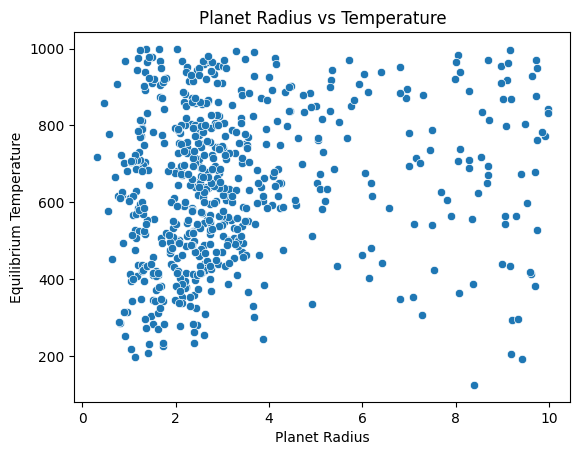

In [15]:
sns.scatterplot(
    x=df_no_outliers["pl_rade"],
    y=df_no_outliers["pl_eqt"]
)
plt.xlabel("Planet Radius")
plt.ylabel("Equilibrium Temperature")
plt.title("Planet Radius vs Temperature")
plt.show()


In [16]:
df_no_outliers.to_csv(
    "../data/processed/exoplanet_features.csv",
    index=False
)


## Data Cleaning Summary

In this phase, the raw exoplanet dataset was cleaned and prepared for machine
learning. Missing values were handled, outliers were removed, and new features
were engineered to capture habitability-related insights.

The cleaned and feature-engineered dataset is now suitable for machine learning
model preparation in the next phase of the project.
